# Ejercicio 1: Sistema de Ecuaciones Lineales

A continuación, encontrará los argumentos para el desarrollo del
ejercicio 1 sobre Métodos de resolución de Sistemas de Ecuaciones Lineales:
Para cada uno de los estudiantes del grupo, dado el siguiente código en Python

Transcríbalo en su archivo de Google Colab y comente cada una de las líneas indicando brevemente qué hacen, y realice un comentario general de lo que hace todo el código y cuál es el resultado de su ejecución.

In [ ]:
import numpy as np       #Importa al entorno de trabajo la galeria numpy 
n=10
A=np.random.rand(n,n)    #Crea una matriz aleatoria nxn
b=np.random.rand(n)      #Crea un vector de n elementos 
alpha=3*n
ADD=np.dot(A,A.T)+alpha*np.identity(n) #np.dot(A,A.T): producto escalar entre A y la transpuesta de A, np.identity(n): genera una matriz identidad.
#El codigo en general genera una matriz y un vector aleatorios, de n filas con n columnas, al final se transforma la matriz de forma que los elementos de la 
#diagonal sean mayores a los demas elementos, es decir sea estrictamente diagonal dominante

#### Determinar si el SEL tiene, o no, solución. ¿Si la tiene, es única? Realice una breve explicación basándose en la teoría revisada.
De acuerdo con el Teorema de Rouché-Fröbenius,la condición necesaria y suficiente para que un sistema de m ecuaciones lineales con n incógnitas sea compatible es que el rango de la matriz de los coeficientes de las incógnitas sea igual al rango de la matriz ampliada con los términos independientes. Ademas, si ese rango es igual al numero de incognitas el sistema es compatible y determinado.

In [ ]:
A_T=np.zeros((n,n+1))
for i in range(0,n):
    for j in range(0,n):
        A_T[i,j]=ADD[i,j]
        if j==n-1:
            A_T[i,j+1]=b[i]
            
Rango_ADD=np.linalg.matrix_rank(ADD) 
Rango_A_T=np.linalg.matrix_rank(A_T)

if Rango_ADD == Rango_A_T: 
    print("El Sistema de ecuaciones es compatible, ya que El rango de la matriz de coeficientes es igual al rango de la matriz ampliada")
    
if Rango_ADD==n:
        print("El sistema de ecuaciones lineales es determinado, ya que, el rango de las matrices es igual al numero de incognitas")
else:
    print("El sistema no de ecuaciones no es compatible")

El Sistema de ecuaciones es compatible, ya que El rango de la matriz de coeficientes es igual al rango de la matriz ampliada
El sistema de ecuaciones lineales es determinado, ya que, el rango de las matrices es igual al numero de incognitas


## Determinar si la matriz es Diagonalmente Dominante y si los métodos descritos abajo convergirán, o no.
Para garantizar la convergencia de los metodos iterativos para la resolucion de sistemas de ecuaciones lineales es necesario y suficiente que el elemento ubicado en la diagonal principal de cada ecuacion sea
mayor en valor absoluto que la suma del resto de los elementos de la misma ecuacion, es decir, que esta matriz sea estrictamente diagonal dominante.

$$|a_{i,i}|>\sum_{j=0,j\neq i}^n|a_{i,j}| \hspace{1 cm}$$

In [ ]:
Id=np.zeros((n))
for i in range(0,n):
    for j in range(0,n):
        if i==j:
            Id[i]=ADD[i,j]
it=0
for i in range(0,n):
    s=0
    for j in range(0,n):
        if i==j:
            s=s
        else:
            s=ADD[i,j]+s
    if Id[i]>s:
        it=it+1

if it==n: #Condicion si el sistema es estrictamente diagonal dominante:
    print("La matriz es estrictamente diagonal dominante, por lo que la sucesion generada por los metodos iterativos converge")
else:
    print("La matriz no es estrictamente diagonal dominante, no se garantiza la convergencia de los metodos iterativos")

La matriz es estrictamente diagonal dominante, por lo que la sucesion generada por los metodos iterativos converge


# Metodo de Gauss Seidel
Comienza con una aproximación inicial x(0) a la solución x y genera una sucesión de vectores x(k) que convergen a la solución x, empleando la siguiente ecuación:


$$x^{k+1}_i=\left(\frac{1}{a_{i,j}}\right)\left(b_i-\sum_{j=1}^n a_{i,j}x_j^k-\sum_{j=i+1}^n a_{i,j}x_j^{k-1}\right) \hspace{1 cm}$$

# Criterio de convergencia

$$E=||x_{i}-x_{i-1}||\eqslantless 10^{-6} \hspace{1 cm}$$

Para determinar la convergencia del método utilizamos la norma vectorial

$$||x_2||=\sqrt{\left(x_1^2+ \cdots +x_n^2 \right)} \hspace{1 cm}$$


In [ ]:
import pandas as pd
# Inicializar de las variables
q=np.zeros(n+1)

for i in range(n+1):
    q[i]=int(i+1)

X = np.zeros_like(b)        # Vector solucion
contador= 0                 # Numero de iteraciones
E = []                      # Porcentaje de error
Err = 1                     # Error inicial
tol=1e-6                    # Tolerancia

#Inicio ciclo iterativo

while Err > tol:
    contador += 1
    for i in range(ADD.shape[0]):
        suma = 0
        # Se realiza la iteracion por el metodo de gauss seidel
        for j in range(ADD.shape[1]):
                if j != i:
                    suma += ADD[i][j] * X[j]
        
        
        X[i] = (b[i] - suma) / ADD[i, i]
    
    # Se calcula la norma del error para determinar el error de cada aproximacion
    Err = np.linalg.norm(np.matmul(ADD, X) - b)
    
    # Se almacena el error en una lista para su posterior graficación. 
    E.append(Err)


# Solucion
print("Resultados Gauss seidel")
print("Iteraciones: ", contador)
n=int(len(E))
print("%Error: ", E[n-1])
print ("Sln: ")
bb=np.dot(ADD,X)
d={"x_i":q,"x":X,"b":b,"Ax=b":bb}
TT=pd.DataFrame(d)
TT.set_index("x_i",inplace=True)
print(TT.to_string())

Resultados Gauss seidel
Iteraciones:  9
%Error:  3.1855817004020245e-07
Sln: 
             x         b      Ax=b
x_i                               
1.0  -0.005735  0.043032  0.043033
2.0   0.009088  0.537603  0.537603
3.0   0.003191  0.337201  0.337201
4.0   0.011390  0.548219  0.548219
5.0   0.020020  0.810738  0.810738
6.0   0.007662  0.443270  0.443270
7.0   0.002609  0.322854  0.322854
8.0   0.015291  0.636109  0.636109
9.0   0.004073  0.357393  0.357393
10.0  0.011342  0.586344  0.586344


# Metodo de Jacobi

Este método parte de una aproximación inicial, a partir de esta recalcula los valores de x al despejarla de una ecuación, este proceso se realiza para las n incógnitas x y cada cálculo se realiza con los valores de la aproximación anterior. La ecuacion de iteracion del metodo en su forma escalar es:

$$x^{k+1}_i=\left(\frac{1}{a_{i,j}}\right)\left(b_i-\sum_{j\neq 1}^n a_{i,j}x_j^k\right) \hspace{1 cm}$$

# Criterio de convergencia

$$E=||x_{i}-x_{i-1}||\eqslantless 10^{-6} \hspace{1 cm}$$

Para determinar la convergencia del método utilizamos la norma vectorial

$$||x_2||=\sqrt{\left(x_1^2+ \cdots +x_n^2 \right)} \hspace{1 cm}$$


In [ ]:
#Método de Jacobi

X_2 = np.zeros_like(b)          # Vector solucion
contador_2= 0                   # Numero de iteraciones
E_2 = []                        # Porcentaje de error
Err = 1                         # Error inicial
tol=1e-6                        # Tolerancia


while Err > tol:
    
    XX_2 = np.zeros_like(X_2) # Vector auxiliar almacena la iteracion anterior.
    contador_2+= 1
    for i in range(ADD.shape[0]):
        suma = 0
        for j in range(ADD.shape[1]):
            if j != i:
                suma += ADD[i][j] * X_2[j]
        
        XX_2[i] = (b[i] - suma) / ADD[i, i]
        
    Err = np.linalg.norm(np.matmul(ADD, XX_2) - b)
        
    E_2.append(Err)

    X_2= XX_2                # Almacena la solucion actual
        
# Solucion
print("Resultados Jacobi")
print("iteraciones: ", contador_2)
n=int(len(E_2))
print("%Error: ", E_2[n-1])
print("Sln: ")
bb=np.dot(ADD,X_2)
d={"x_i":q,"x":X,"b":b,"Ax=b":bb}
TT=pd.DataFrame(d)
TT.set_index("x_i",inplace=True)
print(TT.to_string())


Resultados Jacobi
iteraciones:  60
%Error:  8.390210481572359e-07
Sln: 
             x         b      Ax=b
x_i                               
1.0  -0.005735  0.043032  0.043032
2.0   0.009088  0.537603  0.537602
3.0   0.003191  0.337201  0.337201
4.0   0.011390  0.548219  0.548218
5.0   0.020020  0.810738  0.810738
6.0   0.007662  0.443270  0.443270
7.0   0.002609  0.322854  0.322854
8.0   0.015291  0.636109  0.636109
9.0   0.004073  0.357393  0.357393
10.0  0.011342  0.586344  0.586344


# Metodo de S.O.R

Después de calcular un nuevo valor de x por la ecuación de Gauss Seidel, ese valor se modifica por un promedio ponderado de los resultados de las iteraciones gs (hecha con Gauss-Seidel) y anterior, esto se conoce como técnica SOR(sucessive over-relaxation) o de relajación. El esquema es el siguiente

$$x^{k+1}_i=\left(\frac{\omega}{a_{i,j}}\right)\left(b_i-\sum_{j=1}^n a_{i,j}x_j^k-\sum_{j=i+1}^n a_{i,j}x_j^{k-1}\right)+(1-\omega)x_i^k \hspace{1 cm}$$

# Criterio de convergencia

$$E=||x_{i}-x_{i-1}||\eqslantless 10^{-6} \hspace{1 cm}$$

Para determinar la convergencia del método utilizamos la norma vectorial

$$||x_2||=\sqrt{\left(x_1^2+ \cdots +x_n^2 \right)} \hspace{1 cm}$$

In [ ]:
# Método S.O.R

X_3 = np.zeros_like(b)          # Vector solucion
contador_3= 0                   # Numero de iteraciones
E_3 = []                        # Porcentaje de error
Err = 1                         # Error inicial
tol=1e-6                        # Tolerancia
w=1.1

while Err > tol:
    contador_3 += 1
    for i in range(ADD.shape[0]):
        suma = 0
        for j in range(ADD.shape[1]):
                if j != i:
                    suma += ADD[i][j] * X_3[j]
        
        
        X_3[i] = (1 - w) * X_3[i] + w * (b[i] - suma) / ADD[i, i]
        
    Err = np.linalg.norm(np.matmul(ADD, X_3) - b)
        
    E_3.append(Err)   
    

# Solucion
print("Resultados SOR")
print("Iteraciones: ", contador_3)
n=int(len(E_3))
print("%Error: ", E_3[n-1])
print ("Sln: ")
bb=np.dot(ADD,X_2)
d={"x_i":q,"x":X,"b":b,"Ax=b":bb}
TT=pd.DataFrame(d)
TT.set_index("x_i",inplace=True)
print(TT.to_string())

Resultados SOR
Iteraciones:  11
%Error:  4.224691744474859e-07
Sln: 
             x         b      Ax=b
x_i                               
1.0  -0.005735  0.043032  0.043032
2.0   0.009088  0.537603  0.537602
3.0   0.003191  0.337201  0.337201
4.0   0.011390  0.548219  0.548218
5.0   0.020020  0.810738  0.810738
6.0   0.007662  0.443270  0.443270
7.0   0.002609  0.322854  0.322854
8.0   0.015291  0.636109  0.636109
9.0   0.004073  0.357393  0.357393
10.0  0.011342  0.586344  0.586344


#### Realizar una gráfica de la forma como va convergiendo la solución (Número de iteraciones vs norma del error). Realice una breve explicación, sustentándose en la teoría revisada, acerca de los resultados. ¿Cuál considera que es el mejor método para el SEL seleccionado en particular? ¿por qué?

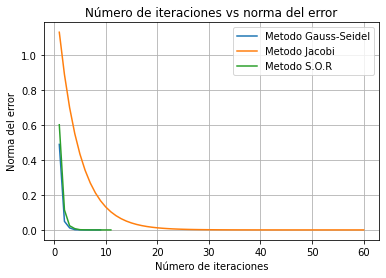

In [ ]:
import matplotlib.pyplot as plt
# Grafica de resultados
# Se grafica el error vs el numero de iteraciones

C_1 = np.linspace(1,contador,contador)
C_2 = np.linspace(1,contador_2,contador_2)
C_3 = np.linspace(1,contador_3,contador_3)

plt.title("Número de iteraciones vs norma del error")
plt.plot(C_1,E,label = "Metodo Gauss-Seidel")
plt.plot(C_2,E_2,label = "Metodo Jacobi")
plt.plot(C_3,E_3, label = "Metodo S.O.R")
plt.grid()
plt.xlabel("Número de iteraciones")
plt.ylabel("Norma del error")
plt.legend()
plt.show()

# Analisis de resultados:
Los metodos empleados cumplieron los criterios de convergencia obteniendo la misma respuesta para la solucion del sistema. El método SOR proporciona una solución más rápida si este converge por Gauss Seidel o lo ayuda a converger en caso de no ser así. Todo depende del parámetro omega seleccionado, el cual, se busca de forma que ofrezca un mejor desempeño que el metodo de Gauss Seidel

# Referencias
Nieves, A. (2015). Métodos numéricos: aplicados a la ingeniería.
Grupo Editorial Patria. (pp. 231 – 242).

# Enlace Video:
https://www.youtube.com/watch?v=8_c8s3kgPjY